### Redes Neuronales Convolucionales (CNN)

Situación: Eres un investigador que quiere clasificar imágenes de ropa (prendas) en 10 categorías diferentes usando el dataset **Fashion-MNIST**.

#### Paso 1: Importaciones

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Verificar versión de TensorFlow
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


#### Paso 2: Cargar y Exportar Datos

In [2]:
# Cargar dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Explorar forma de los datos
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)


x_train: 60 mil imágenes de 28x28 píxeles.  
y_train: 60 mil etiquetas.

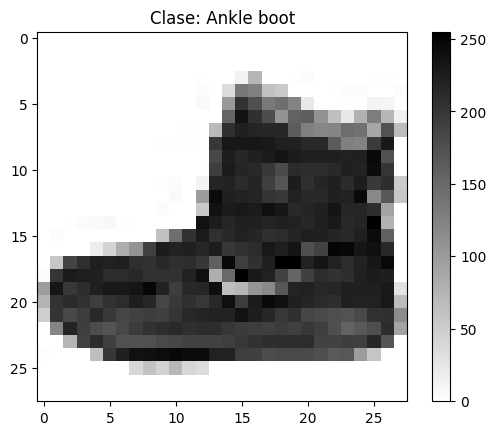

In [3]:
# Nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualizar una imagen
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.title(f"Clase: {class_names[y_train[0]]}")
plt.colorbar()

plt.show()

#### Paso 3: Preprocesamiento

In [4]:
# Normalizar píxeles (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir dimensión de canal (blanco-negro -> 1 canal)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Convertir etiquetas a one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### Paso 4: Construit la CNN

In [5]:
# Crear modelo secuencial
modelo = models.Sequential()

# Capa convolucional 1
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 2
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Capa convolucional 3
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu'))

# Aplanar y conectar a capas densas
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation = 'relu'))
modelo.add(layers.Dense(10, activation = 'softmax'))

# Resumen del modelo
modelo.summary()

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,426 (220.41 KB)

 Trainable params: 56,426 (220.41 KB)

 Non-trainable params: 0 (0.00 B)

#### Paso 5: Compilar y Entrenar

In [6]:
# Compilar modelo
modelo.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

# Entrenar
history = modelo.fit(x_train, y_train,
                     epochs = 10,
                     batch_size = 64,
                     validation_split = 0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.6857 - loss: 0.8531 - val_accuracy: 0.8517 - val_loss: 0.4106
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8621 - loss: 0.3865 - val_accuracy: 0.8750 - val_loss: 0.3463
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8850 - loss: 0.3188 - val_accuracy: 0.8849 - val_loss: 0.3115
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8942 - loss: 0.2915 - val_accuracy: 0.8873 - val_loss: 0.3141
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9049 - loss: 0.2637 - val_accuracy: 0.8923 - val_loss: 0.2907
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9137 - loss: 0.2372 - val_accuracy: 0.8992 - val_loss: 0.2723
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9160 - loss: 0.2237 - val_accuracy: 0.9062 - val_loss: 0.2584
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9226 - loss: 0.2098 - 

#### Paso 6: Evaluar y Visualizar Resultados

313/313 - 2s - 7ms/step - accuracy: 0.9068 - loss: 0.2622

Precision en test: 0.9068


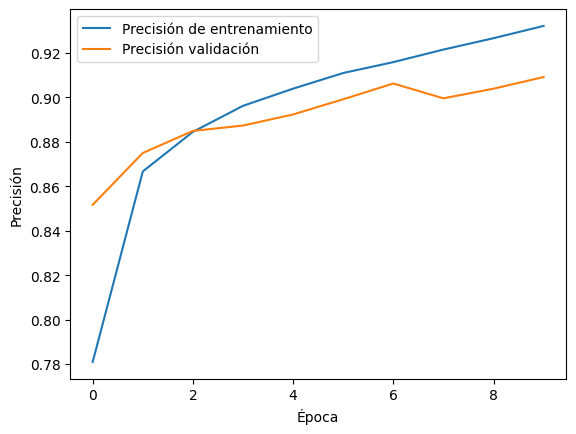

In [7]:
# Evaluar en test
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose = 2)
print(f"\nPrecision en test: {test_acc:.4f}")

# Gráfico de precisión
plt.plot(history.history['accuracy'], label = 'Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

Ejercicio CNN:

1. Modifica la arquitectura: añade una capa convolucional más con 128 filtros.
2. Combina el optimizador a SGD y compara los resultados.
3. Visualiza las predicciones incorrectas en el conjunto de prueba.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import classification_report
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)


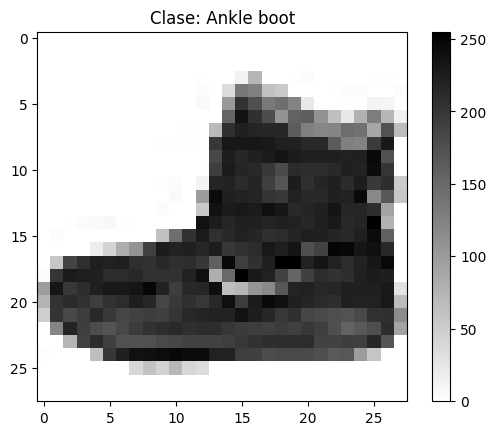

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.title(f"Clase: {class_names[y_train[0]]}")
plt.colorbar()

plt.show()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
modelo = models.Sequential([

    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.Flatten(),

    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
modelo.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = modelo.fit(x_train, y_train,
                     epochs = 10,
                     batch_size = 64,
                     validation_split = 0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.7011 - loss: 0.8205 - val_accuracy: 0.8540 - val_loss: 0.4120
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.8580 - loss: 0.3884 - val_accuracy: 0.8740 - val_loss: 0.3410
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.8865 - loss: 0.3134 - val_accuracy: 0.8888 - val_loss: 0.3037
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8955 - loss: 0.2873 - val_accuracy: 0.8996 - val_loss: 0.2849
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9072 - loss: 0.2494 - val_accuracy: 0.8907 - val_loss: 0.3029
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9177 - loss: 0.2265 - val_accuracy: 0.9053 - val_loss: 0.2602
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9210 - loss: 0.2098 - val_accuracy: 0.9023 - val_loss: 0.2674
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9279 - loss: 0.1940 - 

In [8]:
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose = 2)
print(f"\nPrecisión en test: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9055 - loss: 0.2856

Precisión en test: 0.9055


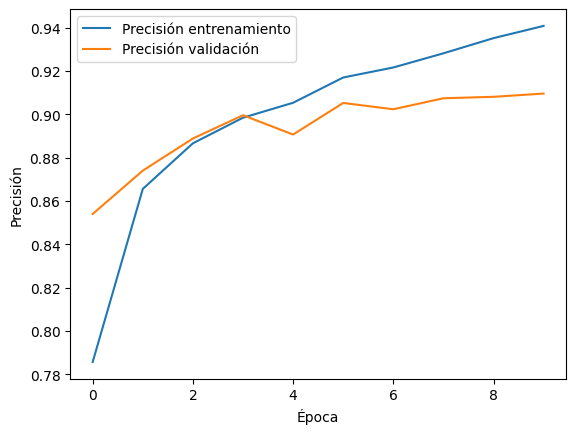

In [9]:
plt.plot(history.history['accuracy'], label = 'Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.show()

---

### Procesamiento de Lenguaje Natural (NLP) con RNNs

Situación: Quieres clasificar reseñas de películas como positivas o negativas usando el dataset IMDB.

#### Paso 1: Importaciones

In [10]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

#### Paso 2: Cargar y Provesar Texto

In [11]:
# Cargar dataset IMDB (solo 10.000 palabras más frecuentes)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

# Inspeccionar una reseña
print("Longitud reseña ejemplo:", len(x_train[0]))
print("Reseña (codificada:)", x_train[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Longitud reseña ejemplo: 218
Reseña (codificada:) [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 

In [12]:
# Padding para secuencias de longitud variable
max_length = 500
x_train = pad_sequences(x_train, maxlen = max_length, padding = 'post')
x_test = pad_sequences(x_test, maxlen = max_length, padding = 'post')

print("Forma después del padding:", x_train.shape)

Forma después del padding: (25000, 500)


#### Paso 3: Construir Modelo RNN con LSTM

In [13]:
# Crear modelo
modelo = Sequential()

modelo.add(Embedding(vocab_size, 32, input_length = max_length))
modelo.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))
modelo.add(Dense(1, activation = 'sigmoid')) # Clasificación binaria

# Compilar
modelo.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

modelo.summary()

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Paso 4: Entrenar y Evaluar

In [14]:
# Entrenar
history = modelo.fit(x_train, y_train,
                     epochs = 5,
                     batch_size = 64,
                     validation_split = 0.2)

# Evaluar
test_loss, test_acc = modelo.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 168s 513ms/step - accuracy: 0.5010 - loss: 0.6935 - val_accuracy: 0.4944 - val_loss: 0.6930
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 503ms/step - accuracy: 0.5057 - loss: 0.6922 - val_accuracy: 0.5090 - val_loss: 0.6923
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 501ms/step - accuracy: 0.5178 - loss: 0.6822 - val_accuracy: 0.5020 - val_loss: 0.6900
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 501ms/step - accuracy: 0.5289 - loss: 0.6655 - val_accuracy: 0.5082 - val_loss: 0.6990
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 507ms/step - accuracy: 0.5401 - loss: 0.6507 - val_accuracy: 0.5152 - val_loss: 0.7032
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5207 - loss: 0.7038
Precisión en test: 0.5108


Ejercicio NLP:

1. Añade una segunda capa LSTM y compara los resultados.
2. Prueba con Embeddings más grandes (64 unidades en lugar de 32).
3. Visualiza la pérdida durante el entrenamiento.

In [15]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [17]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

max_length = 500
x_train = pad_sequences(x_train, maxlen = max_length, padding = 'post')
x_test = pad_sequences(x_train, maxlen = max_length, padding = 'post')

In [18]:
modelo = Sequential()

modelo.add(Embedding(vocab_size, 64, input_length = max_length))
modelo.add(LSTM(64, return_sequences = True))
modelo.add(LSTM(32))
modelo.add(Dense(1, activation = 'sigmoid'))

c:\Users\PrancherC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
modelo.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = modelo.fit(x_train, y_train,
                     epochs = 5,
                     batch_size = 64,
                     validation_split = 0.2)

test_loss, test_acc = modelo.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 580ms/step - accuracy: 0.5011 - loss: 0.6933 - val_accuracy: 0.5056 - val_loss: 0.6926
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 610ms/step - accuracy: 0.5171 - loss: 0.6840 - val_accuracy: 0.5196 - val_loss: 0.6867
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 175s 524ms/step - accuracy: 0.5406 - loss: 0.6599 - val_accuracy: 0.5154 - val_loss: 0.7043
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 519ms/step - accuracy: 0.5412 - loss: 0.6415 - val_accuracy: 0.5206 - val_loss: 0.7133
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 508ms/step - accuracy: 0.5449 - loss: 0.6343 - val_accuracy: 0.5218 - val_loss: 0.7406
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.5075 - loss: 0.8673
Precisión en test: 0.5009
